In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [8]:
# older month 
# DATASET_FILENAME = 'https://myspeed.trai.gov.in/download/sept18_publish.csv'
# newer month 
# DATASET_FILENAME2 = 'https://myspeed.trai.gov.in/download/oct18_publish.csv'
   
CONST_OPERATOR = 'JIO'
CONST_STATE = 'Delhi'
CONST_TECHNOLOGY = '4G'
column_names = ['Service Provider', 'Technology', 'Test Type', 'Data Speed', 'Signal Strength', 'State']

In [9]:
# read file with Pandas and store as Dataframe 
df = pd.read_csv('sept18_publish.csv', header=None, names=column_names) # when headers are not provided
df2 = pd.read_csv('oct18_publish.csv', header=None, names=column_names) # when headers are not provided

In [13]:
states = df['State'].unique()
operators = df['Service Provider'].unique()

In [47]:
# define lists 
final_download_speeds_sep, final_upload_speeds_sep = [], []
final_download_speeds_oct, final_upload_speeds_oct = [], []

final_states, final_operators = [] , []

In [48]:
ntdf_sep = df[(df['Service Provider'] == CONST_OPERATOR) & (df['Technology'] == CONST_TECHNOLOGY)]
ntdf_oct = df2[(df2['Service Provider'] == CONST_OPERATOR) & (df2['Technology'] == CONST_TECHNOLOGY)]

In [49]:
for state in states:
    base_sep = ntdf_sep[ntdf_sep['State'] == state]
    avg_down_sep = base_sep[base_sep['Test Type'] == 'download']['Data Speed'].mean()
    avg_upload_sep = base_sep[base_sep['Test Type'] == 'upload']['Data Speed'].mean()
    
    base_oct = ntdf_oct[ntdf_oct['State'] == state]
    avg_down_oct = base_oct[base_oct['Test Type'] == 'download']['Data Speed'].mean()
    avg_upload_oct = base_oct[base_oct['Test Type'] == 'upload']['Data Speed'].mean()
    
    # discard values if mean is not a number(nan) 
    # and append only the needed speeds 
    if (pd.isnull(avg_down_sep) or pd.isnull(avg_upload_sep) or
        pd.isnull(avg_down_oct) or pd.isnull(avg_upload_oct)): 
        avg_down_sep = 0
        avg_upload_sep = 0
        avg_down_oct = 0
        avg_upload_oct = 0
    else:
        final_states.append(state)
        final_download_speeds_sep.append(avg_down_sep)
        final_upload_speeds_sep.append(avg_upload_sep)
        final_download_speeds_oct.append(avg_down_oct)
        final_upload_speeds_oct.append(avg_upload_oct)
        print('September: ' + str(state) + ' -- Download: ' + str('%.2f' % avg_down_sep) + '  Upload: ' + str('%.2f' % avg_upload_sep))
        print('October: ' + str(state) + ' -- Download: ' + str('%.2f' % avg_down_oct) + '  Upload: ' + str('%.2f' % avg_upload_oct))

September: Kerala -- Download: 26129.27  Upload: 5193.46
October: Kerala -- Download: 18917.46  Upload: 4290.13
September: Rajasthan -- Download: 27784.86  Upload: 5736.18
October: Rajasthan -- Download: 13973.66  Upload: 4721.17
September: Maharashtra -- Download: 20707.88  Upload: 4130.46
October: Maharashtra -- Download: 26285.47  Upload: 5848.77
September: UP East -- Download: 22451.35  Upload: 5727.95
October: UP East -- Download: 24368.81  Upload: 6101.20
September: Karnataka -- Download: 16950.36  Upload: 4720.68
October: Karnataka -- Download: 33522.15  Upload: 5871.38
September: Madhya Pradesh -- Download: 23594.85  Upload: 4802.89
October: Madhya Pradesh -- Download: 16614.49  Upload: 4135.70
September: Kolkata -- Download: 26747.80  Upload: 5655.55
October: Kolkata -- Download: 23761.85  Upload: 5153.29
September: Bihar -- Download: 31730.54  Upload: 6599.45
October: Bihar -- Download: 34196.09  Upload: 5215.58
September: Gujarat -- Download: 16377.43  Upload: 3642.89
Octobe

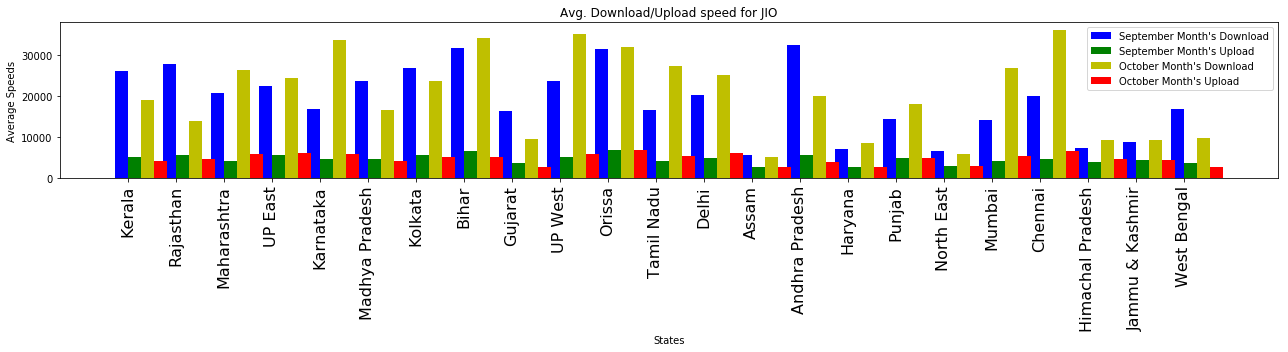

In [106]:
fig, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
index = np.arange(len(final_states))

margin = 0.05
# bar_width = (1.-2.* margin)/len(final_states)
bar_width = 0.27

rects1 = plt.bar(index, final_download_speeds_sep, bar_width, color='b', label='September Month\'s Download')
rects2 = plt.bar(index + bar_width, final_upload_speeds_sep, bar_width, color='g', label='September Month\'s Upload')

rects3 = plt.bar(index + 2 * bar_width, final_download_speeds_oct, bar_width, color='y', label='October Month\'s Download')
rects4 = plt.bar(index + 3 * bar_width, final_upload_speeds_oct, bar_width, color='r', label='October Month\'s Upload')

ax.set_xticklabels(final_states,fontsize=16)
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=8)

plt.xlabel('States')
plt.ylabel('Average Speeds')
plt.title('Avg. Download/Upload speed for ' + str(CONST_OPERATOR))
plt.xticks(index + bar_width/2, final_states, rotation=90)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
